# Marathon Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('MarathonData.csv')

In [11]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [5]:
df.shape

(87, 10)

In [6]:
df.shape

(87, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,87.0,44.000000,25.258662,1.000000,22.500000,44.000000,65.500000,87.00
km4week,87.0,62.347126,26.956019,17.900000,44.200000,58.800000,77.500000,137.50
sp4week,87.0,139.840706,1191.427864,8.031414,11.498168,12.163424,12.854036,11125.00
MarathonTime,87.0,3.319080,0.376923,2.370000,3.045000,3.320000,3.605000,3.98


In [9]:
df.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

id               87
Marathon          1
Name             86
Category          6
km4week          84
sp4week          87
CrossTraining     5
Wall21           52
MarathonTime     67
CATEGORY          4
dtype: int64

In [14]:
df['CATEGORY'].value_counts()

CATEGORY
B    28
A    21
C    21
D    17
Name: count, dtype: int64

## Data Visualization

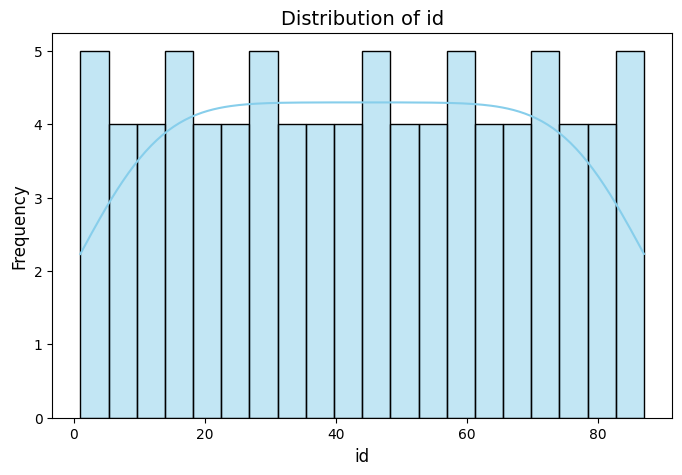

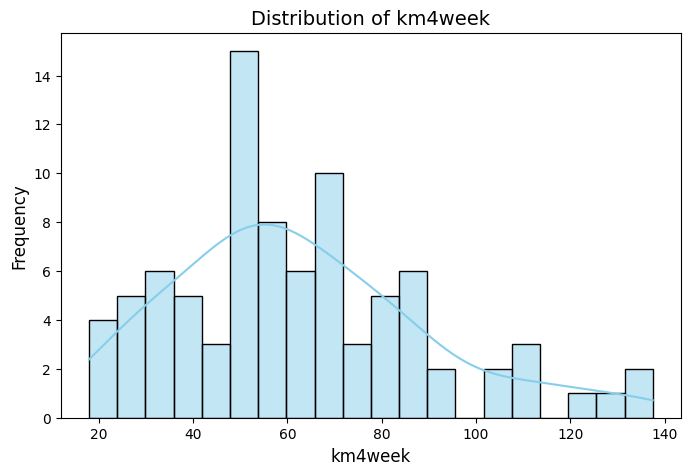

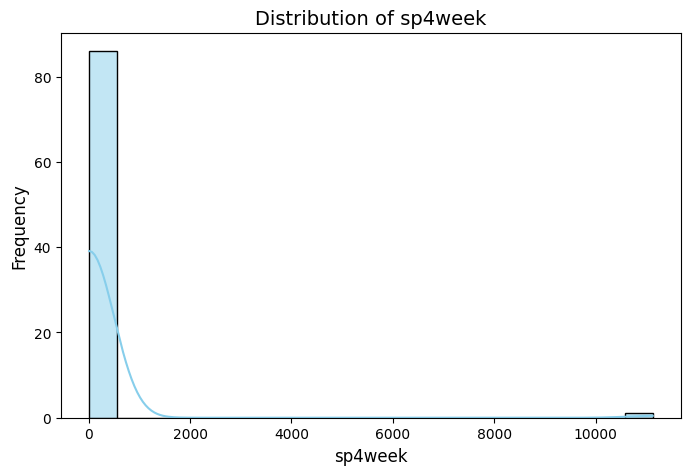

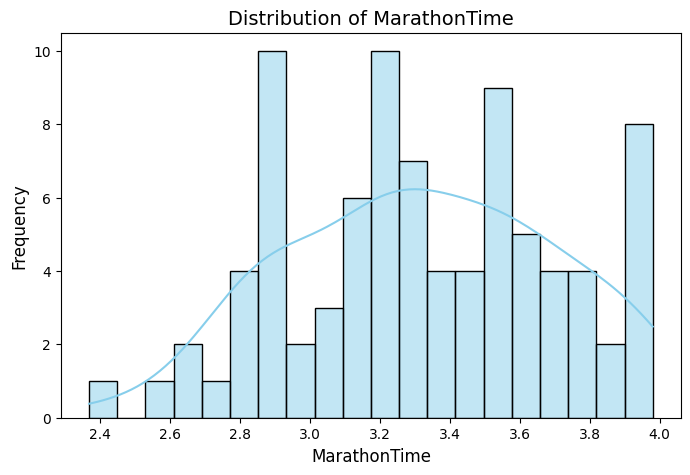

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 🔹 Histogram for each numerical column

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

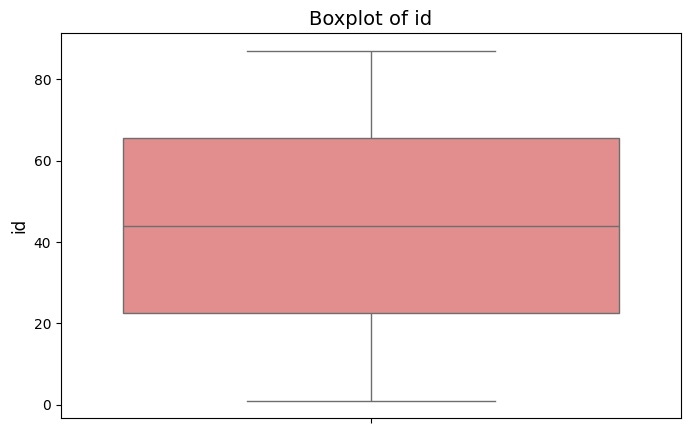

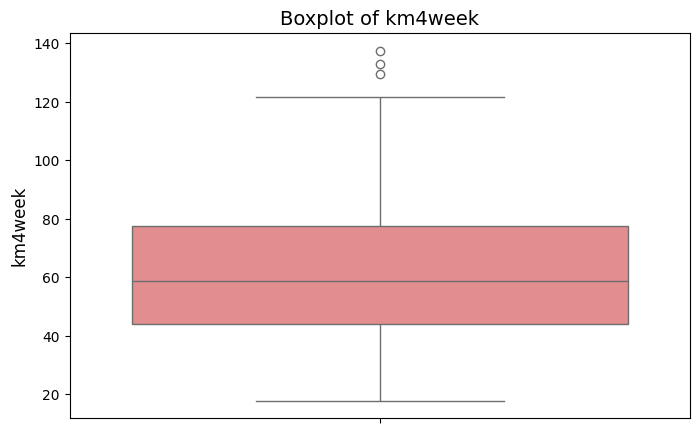

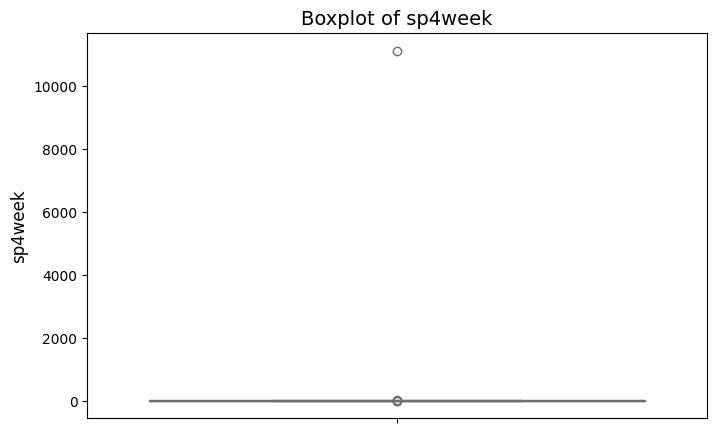

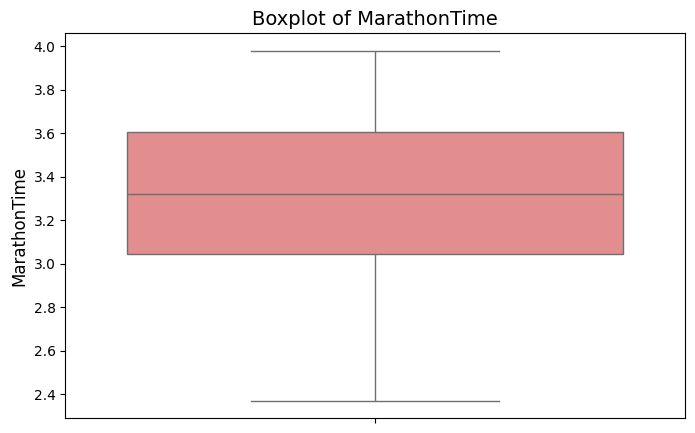

In [16]:
# Boxplots for outlier detection

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col], color="lightcoral")
    plt.ylabel(col, fontsize=12)
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

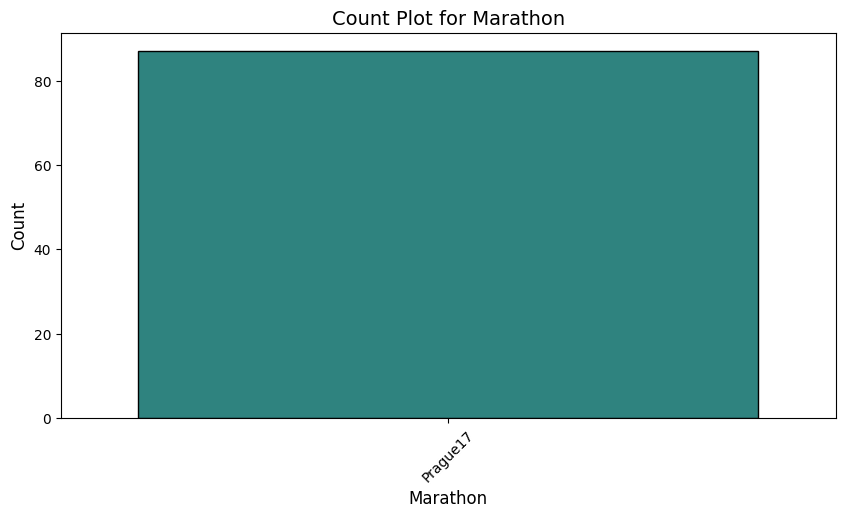

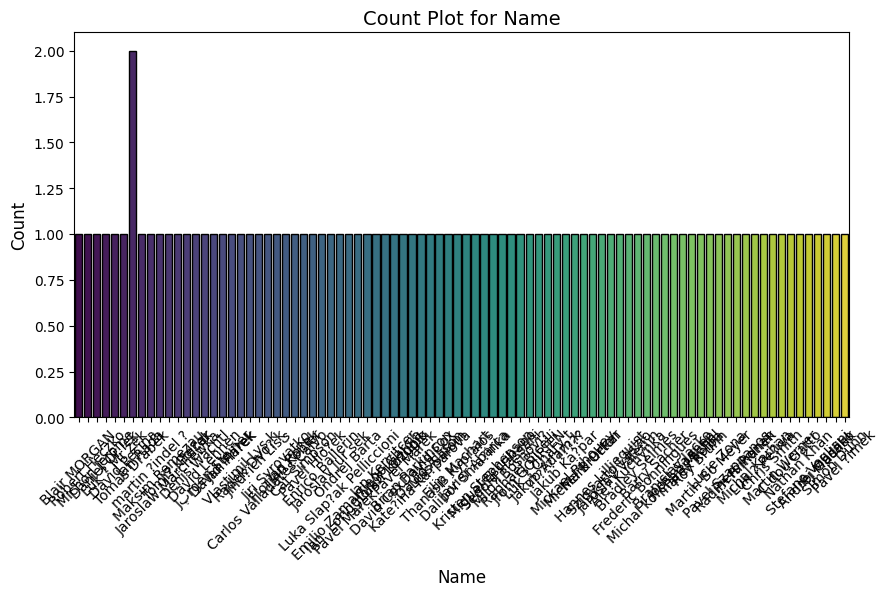

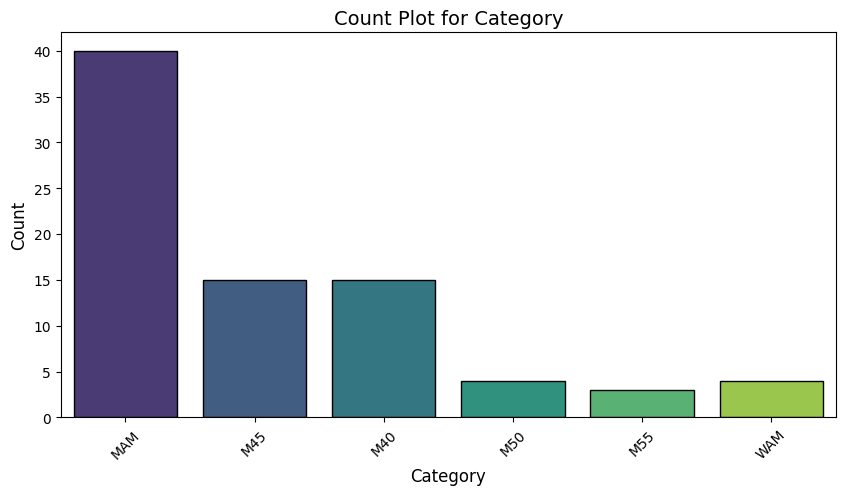

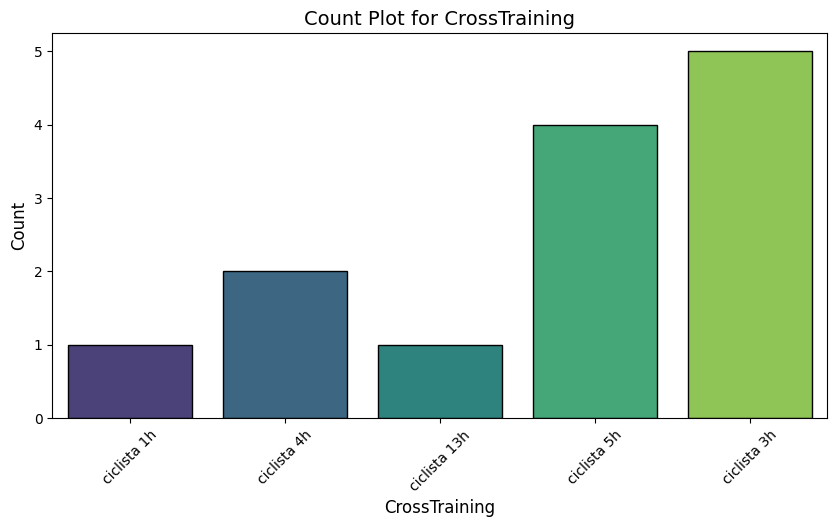

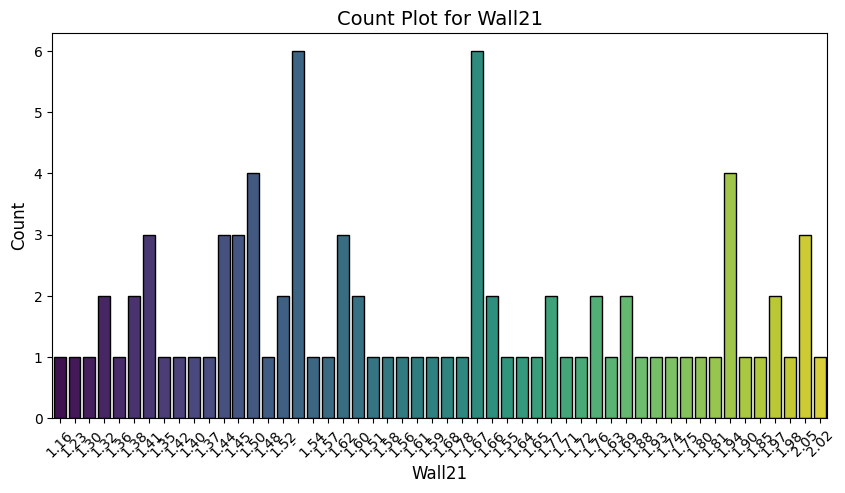

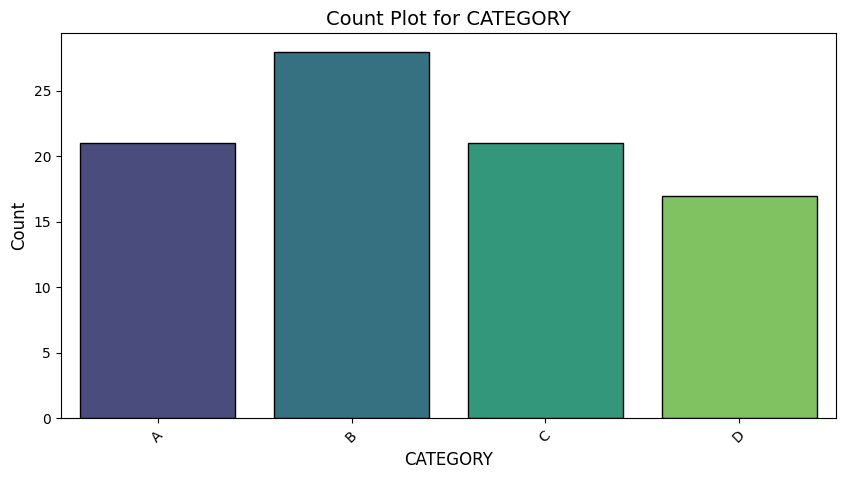

In [17]:
# Count plots for categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], palette="viridis", edgecolor="black")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Count Plot for {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing

In [19]:
# Drooping unwanted column

df.drop('Marathon', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [20]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [22]:
X = df.drop('CATEGORY', axis=1)
y = df['CATEGORY']

In [23]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [24]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [26]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9444444444444444, 0.6666666666666666, 1.0, 1.0, 0.5555555555555556, 1.0, 1.0, 1.0, 0.8333333333333334]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.96      0.94      0.95        18

Confusion Matrix:
 [[4 1 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


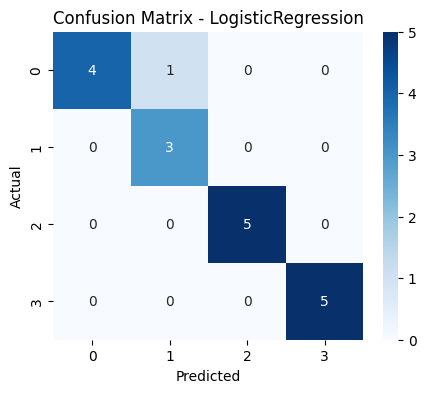

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         3
           2       0.50      0.60      0.55         5
           3       1.00      0.40      0.57         5

    accuracy                           0.67        18
   macro avg       0.75      0.70      0.67        18
weighted avg       0.78      0.67      0.67        18

Confusion Matrix:
 [[4 1 0 0]
 [0 3 0 0]
 [0 2 3 0]
 [0 0 3 2]]


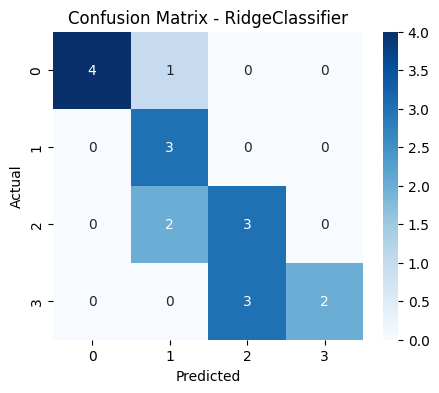

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


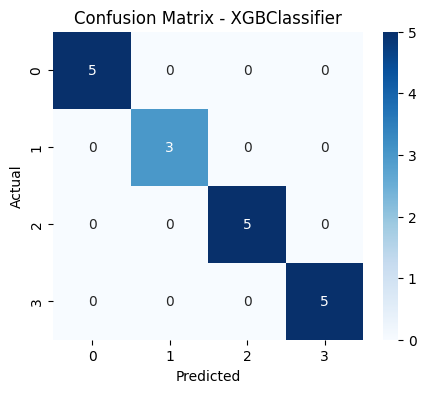

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


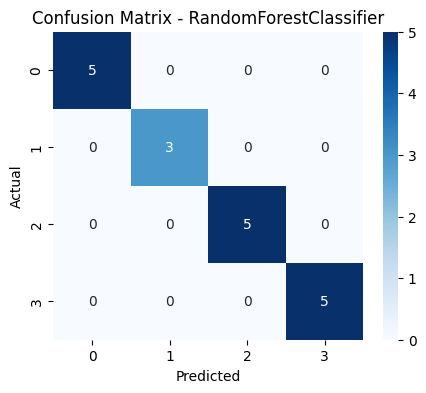

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.38      1.00      0.56         5

    accuracy                           0.56        18
   macro avg       0.35      0.50      0.39        18
weighted avg       0.38      0.56      0.43        18

Confusion Matrix:
 [[5 0 0 0]
 [0 0 0 3]
 [0 0 0 5]
 [0 0 0 5]]


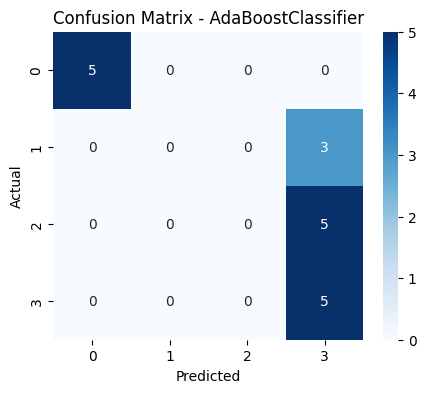

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


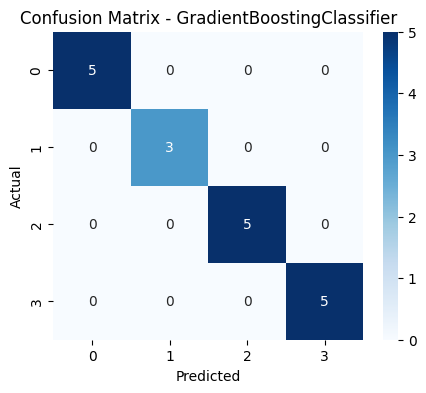

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18

Confusion Matrix:
 [[5 0 0 0]
 [1 2 0 0]
 [0 0 5 0]
 [0 0 0 5]]


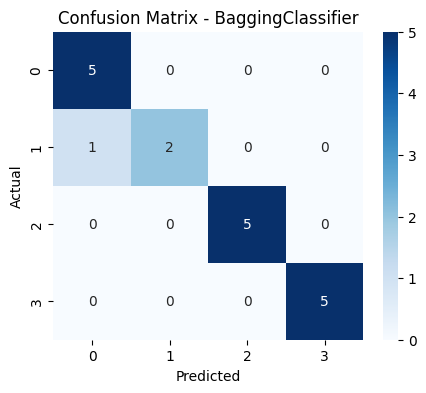

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 5]]


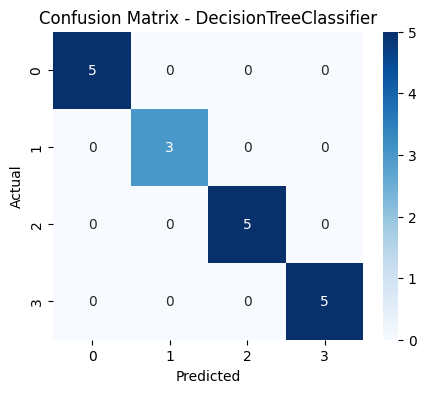

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      1.00      0.86         3
           2       0.67      0.80      0.73         5
           3       1.00      0.60      0.75         5

    accuracy                           0.83        18
   macro avg       0.85      0.85      0.83        18
weighted avg       0.87      0.83      0.83        18

Confusion Matrix:
 [[5 0 0 0]
 [0 3 0 0]
 [0 1 4 0]
 [0 0 2 3]]


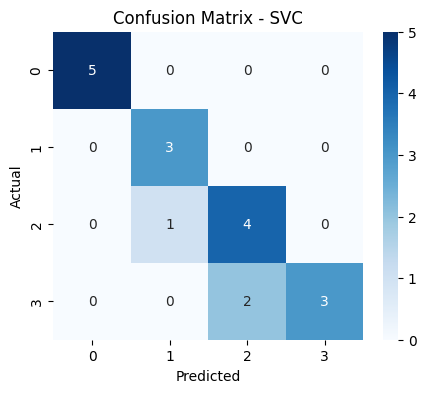

In [27]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()